In [2]:
# Importing Step

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import json
import numpy as np
import math
from matplotlib.ticker import FuncFormatter

<h1><center>Group 1 ASMT-08</center></h1>

<h3>Company Summary</h3>
<h6>________________________________________________________________________________________________________________________</h6>

In [4]:
# Creating DataFrame and Reading in the data

url ='https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*&key=2b1b51cb6cacd2a75465fb1f00658932f347374e'

response = requests.get(url)
data = json.loads(response.text)
df = pd.DataFrame.from_dict(data)

newcolumns = df.iloc[0]

# Removing the first row from the DataFrame
df = df.iloc[1:]

# Renaming the columns
df.rename(columns = newcolumns, inplace = True)

# Resetting the index
df.reset_index(inplace = True, drop = True)

In [5]:
# Filtering the DataFrame to use certain columns for visualizations

filtered_df = df.loc[:, ['SEX_LABEL', 'ETH_GROUP_LABEL', 'EMP', 'PAYANN', 'FIRMPDEMP', 'RCPPDEMP', 'RACE_GROUP_LABEL' ]]

In [6]:
# Changing certain columns datatypes

columns = ['EMP', 'PAYANN', 'FIRMPDEMP', 'RCPPDEMP']

for col in columns:
    filtered_df[col] = filtered_df[col].astype(float)

In [7]:
# Top 50 compnaies by size for scatterplot

top50 = filtered_df.sort_values(by = 'EMP', ascending=False)[:50]

In [8]:
# Checking if there is a correlation between number of employees and total employer firms

correlation = top50['EMP'].corr(top50['FIRMPDEMP'])

In [9]:
# Removing an outlier for cleaner visalization

top50 = top50.drop(top50.index[0])

C:\Users\fmcsw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\fmcsw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\fmcsw\AppData\Local\Temp\ipykernel_12404\4097556912.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, p(x), "r--", color = 'orange')


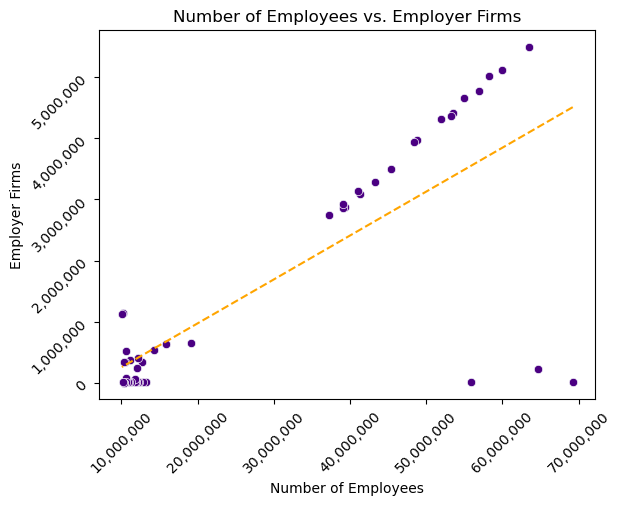

In [10]:
# Setting the two columns equal to an x and y variable
x = top50['EMP']
y = top50['FIRMPDEMP']

# Creating the scatterplot using those variables
sns.scatterplot(x, y);

# Removing the scientific notation and assigning the scatterplot the variable ax
ax = sns.scatterplot(x, y, color = 'indigo');
ax.yaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_scientific(False)

# Defining a function to add commas to new notation
def add_commas(x, pos):
    return '{:,}'.format(int(x))

# Calling the function on both the x and y axis
ax.yaxis.set_major_formatter(FuncFormatter(add_commas))
ax.xaxis.set_major_formatter(FuncFormatter(add_commas))

# Rotating the tickers to fit the chart and have a more cohesive feel
ax.xaxis.set_tick_params(rotation=45)
ax.yaxis.set_tick_params(rotation=45)

# Defining trendline for the scatterplot
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plotting the trendline
plt.plot(x, p(x), "r--", color = 'orange')

# Labeling
plt.xlabel("Number of Employees")
plt.ylabel("Employer Firms")
plt.title('Number of Employees vs. Employer Firms');

In [11]:
# Creating two new DataFrames without null values for the PAYANN and EMP columns

all_payann = filtered_df[filtered_df["PAYANN"] != 0]
race = all_payann[all_payann["EMP"] != 0]

In [12]:
# Creating an average salary column in the new DataFrame

race['Average_Salary'] = (race['PAYANN']/race['EMP'])*1000

C:\Users\fmcsw\AppData\Local\Temp\ipykernel_12404\468738326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race['Average_Salary'] = (race['PAYANN']/race['EMP'])*1000


In [13]:
# Grouping the average salary columns by the race and getting the mean

payroll_by_race = race.groupby("RACE_GROUP_LABEL")["Average_Salary"].mean()

# Resetting index and creating a new column
payroll_df = payroll_by_race.reset_index()

# Renaming columns
payroll_df = payroll_df.rename(columns={"RACE_GROUP_LABEL": "Race"})

# Rounding the average salary column and then casting as an int
payroll_df["Average_Salary_Rounded"] = payroll_df["Average_Salary"].round(0)
payroll_df["Average_Salary_Rounded"] = payroll_df["Average_Salary_Rounded"].astype(int)

# Making finalized DataFrame to use in visualizations
average_payroll = payroll_df[['Race', 'Average_Salary_Rounded']]
average_payroll = average_payroll.rename(columns={"Average_Salary_Rounded": "Average_Salary"})

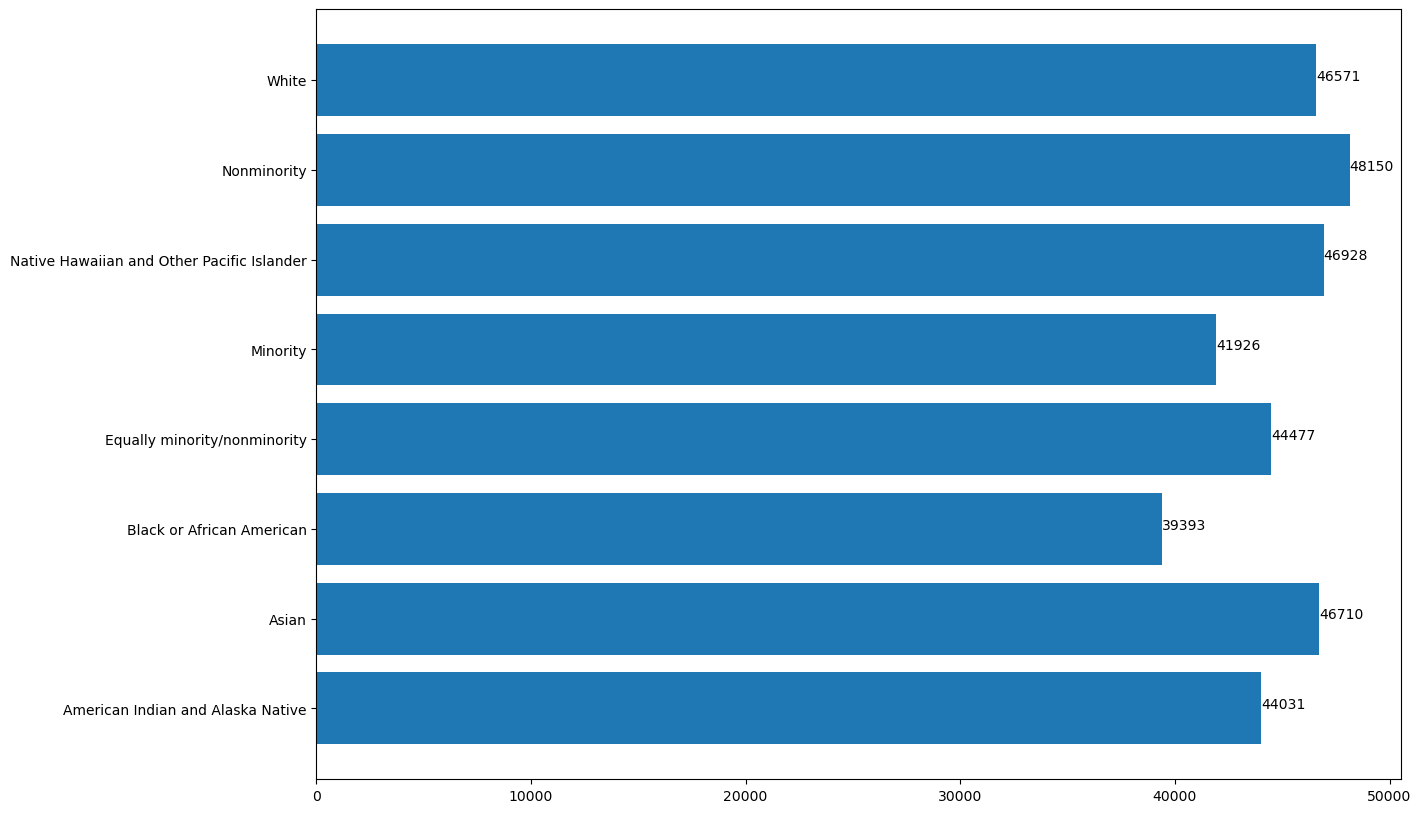

In [14]:
# Removing some the totals, classifiable, and unclassifiable rows
average_payroll = average_payroll[average_payroll["Race"].isin(["American Indian and Alaska Native", "Asian", "Black or African American", 'Equally minority/nonminority', 'Minority', 'Native Hawaiian and Other Pacific Islander', 'Nonminority', 'White'])]

# Setting the size of the chart
plt.figure(figsize=(14, 10))

x = average_payroll['Race']
y = average_payroll['Average_Salary']
# Create the bar chart
plt.barh(x, y);

# Displaying the value at the end of the bars
for i, v in enumerate(y):
    plt.text(v, i, str(v))

<h3>Characteristics of Business</h3>
<h6>________________________________________________________________________________________________________________________</h6>

<h3>Characteristics of Business Owners</h3>
<h6>________________________________________________________________________________________________________________________</h6>

In [3]:
url3 = 'https://api.census.gov/data/2018/abscbo?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_F,OWNPDEMP_PCT,OWNPDEMP_PCT_F,OWNPDEMP_S,OWNPDEMP_S_F,OWNPDEMP_PCT_S,OWNPDEMP_PCT_S_F&for=us:*&QDESC_LABEL=YRACQBUS&key=&key=1cbf5e86c7037dce27fe5bb28774b53fc7855e90'
response3 = requests.get(url3)
data3 = json.loads(response3.text)
charbizowner = pd.DataFrame.from_dict(data3)
# Make the first row the column names
charbizowner.columns = charbizowner.iloc[0]
# Remove the first row from the dataframe
charbizowner = charbizowner.drop(0, axis = 0)
# Reset Index
charbizowner.reset_index(inplace = True)
# Drop index column
charbizowner = charbizowner.drop('index', axis = 1)

In [4]:
# Make the numeric values integer or float
charbizowner[['OWNPDEMP_PCT_S','OWNPDEMP_S','OWNPDEMP_PCT','OWNPDEMP','YEAR']]=charbizowner[['OWNPDEMP_PCT_S','OWNPDEMP_S','OWNPDEMP_PCT','OWNPDEMP','YEAR']].apply(pd.to_numeric)

In [5]:
# Put the column names into lower case so don't have to worry about using upper case
charbizowner.columns = charbizowner.columns.str.lower()

In [6]:
# Renamed columns with clearer names since original were vague 
charbizowner.rename(columns = {
    'ownpdemp': 'number_owners',
    'ownpdemp_pct': 'percent_numb_owners',
    'ownpdemp_s': 'se_numb_owners',
    'ownpdemp_pct_s': 'se_percent_numb_owners'
}, inplace = True)

In [7]:
# Removed flagged values 
charbizowner = charbizowner[(charbizowner['ownpdemp_pct_f'] != 'X') & (charbizowner['ownpdemp_pct_f'] != 'D')]

In [8]:
# Removed the 'Total for all sectors' so I could focus on each industry 
charbizowner = charbizowner[charbizowner['naics2017_label'] != 'Total for all sectors']

In [9]:
# Filtered data to get the total number of owners per industry
industry_totals = charbizowner[(charbizowner['owner_sex_label'] == 'All owners of respondent firms') & (charbizowner['owner_eth_label'] == 'All owners of respondent firms') & (charbizowner['owner_race_label'] == 'All owners of respondent firms') & (charbizowner['owner_vet_label'] == 'All owners of respondent firms') & (charbizowner['ownchar_label'] == 'Total reporting')]
# Sorted the values so the bar graph could be in descending order
industry_totals = industry_totals.sort_values('number_owners', ascending = False)

In [11]:
# Shortened the name so the label wouldn't be so long 
industry_totals = industry_totals.replace('Administrative and support and waste management and remediation services','Administrative, support, and waste management services')

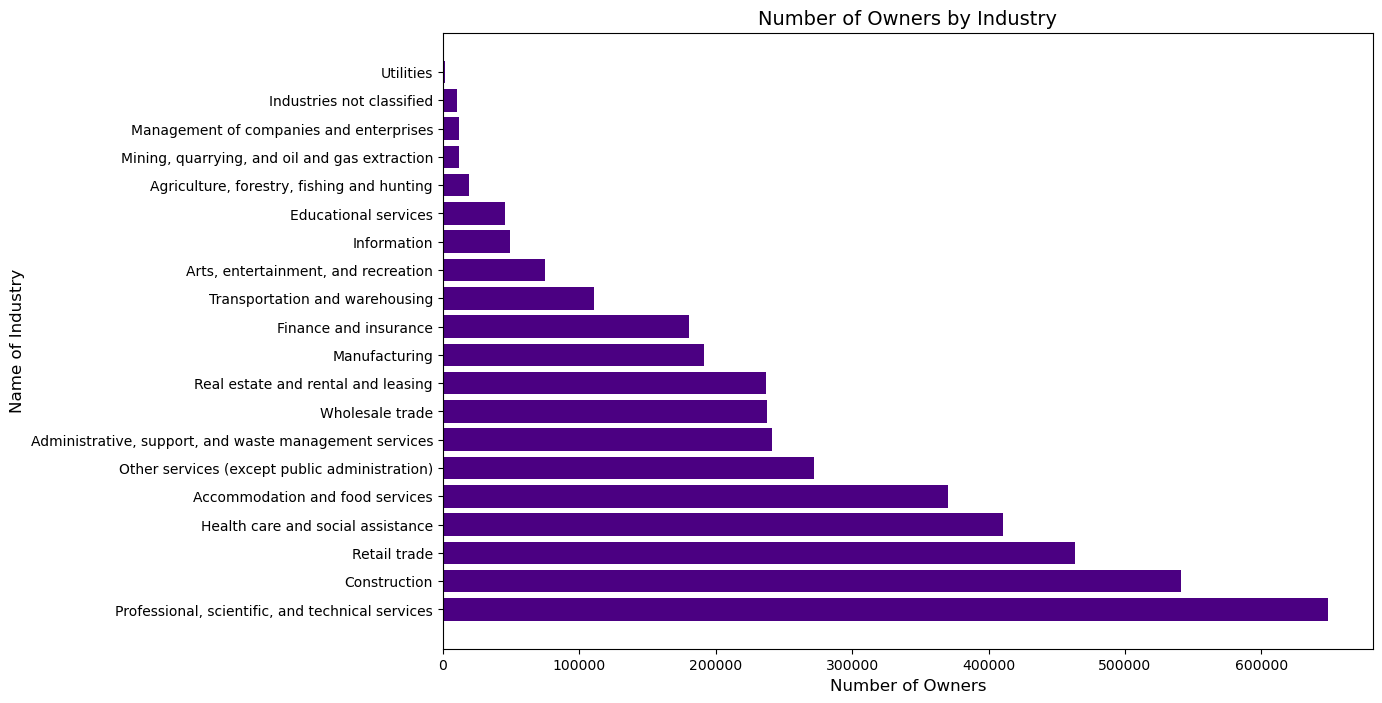

In [14]:
# Set figure size
plt.figure(figsize = (12, 8))
# Horizontal bar graph
plt.barh(y=industry_totals['naics2017_label'], width = industry_totals['number_owners'], color = 'indigo')

# Set title and axes labels
plt.title('Number of Owners by Industry', size = 14)
plt.xlabel('Number of Owners', size = 12)
plt.ylabel('Name of Industry', size = 12);

In [16]:
# Filtered data to get the total number of male vs female owners
male_vs_female = charbizowner[(charbizowner['owner_eth_label'] == 'All owners of respondent firms') & (charbizowner['owner_race_label'] == 'All owners of respondent firms') & (charbizowner['owner_vet_label'] == 'All owners of respondent firms') & (charbizowner['ownchar_label'] == 'Total reporting') & ((charbizowner['owner_sex_label'] == 'Female') | (charbizowner['owner_sex_label'] == 'Male'))]

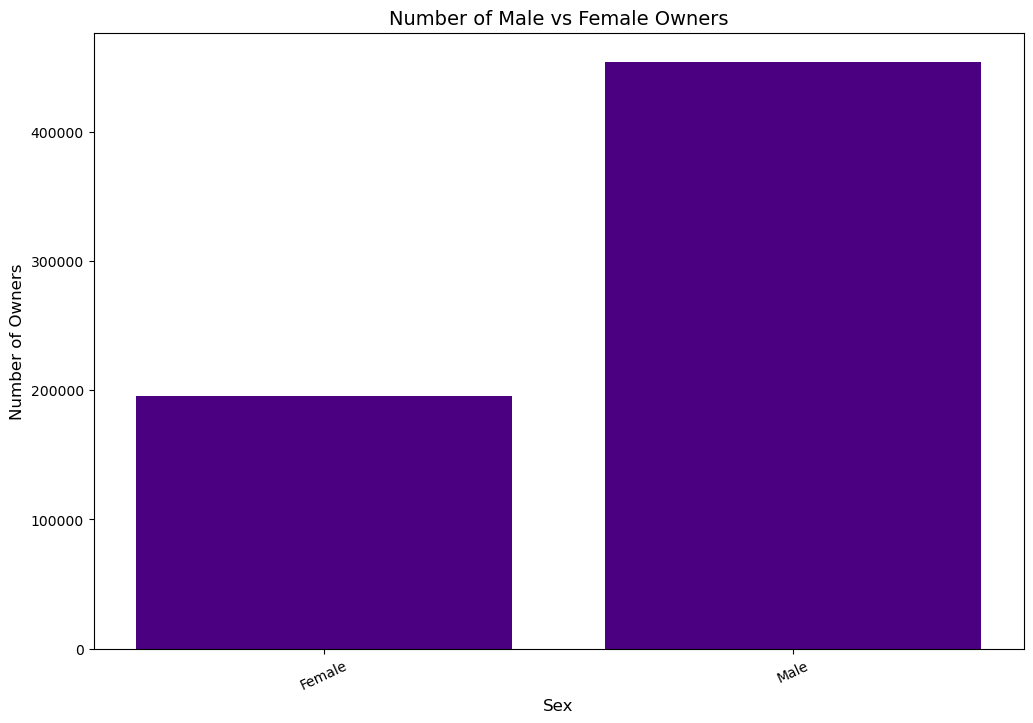

In [32]:
# Set figure size
plt.figure(figsize = (12, 8))
# Bar graph
plt.bar(x=male_vs_female['owner_sex_label'], height = male_vs_female['number_owners'], color = 'indigo')
# Rotate x-axis data labels
plt.xticks(rotation = 25)

# Set title and axes label
plt.title('Number of Male vs Female Owners', size = 14)
plt.xlabel('Sex', size = 12)
plt.ylabel('Number of Owners', size = 12);

In [18]:
# Filtered data to get the total number of minority vs nonminority owners
minority_vs_nonminorty = charbizowner[(charbizowner['owner_sex_label'] == 'All owners of respondent firms') & (charbizowner['owner_eth_label'] == 'All owners of respondent firms') & (charbizowner['owner_vet_label'] == 'All owners of respondent firms') & (charbizowner['ownchar_label'] == 'Total reporting') & ((charbizowner['owner_race_label'] == 'Minority') | (charbizowner['owner_race_label'] == 'Nonminority'))]

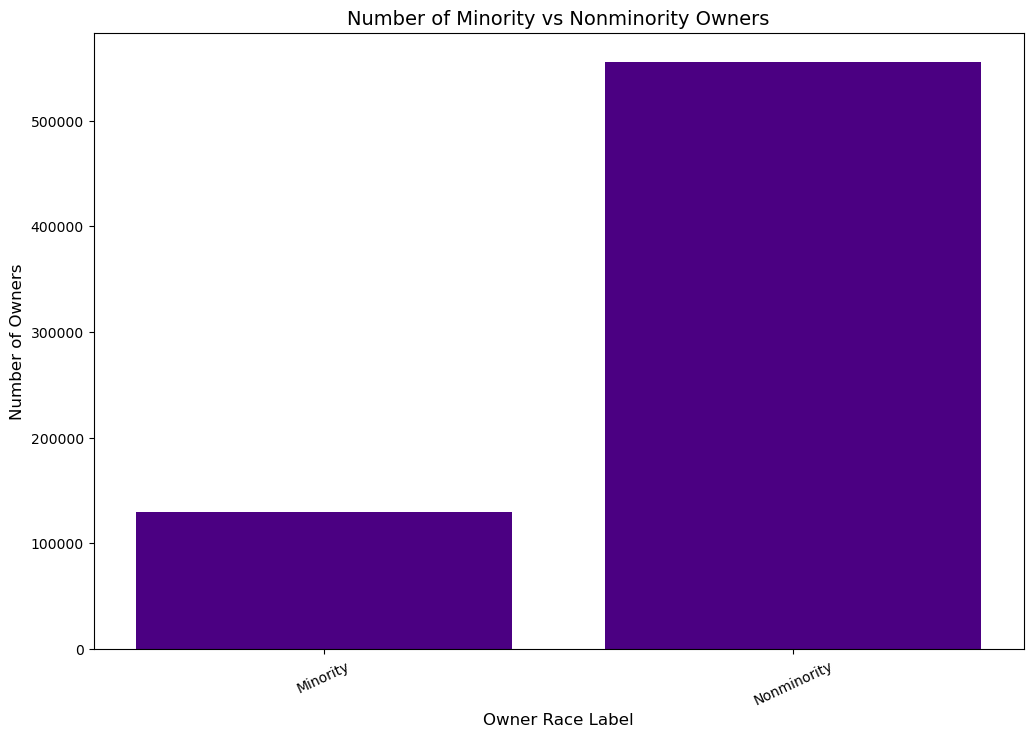

In [19]:
# Set figure size
plt.figure(figsize = (12, 8))
# Bar graph
plt.bar(x=minority_vs_nonminorty['owner_race_label'], height = minority_vs_nonminorty['number_owners'], color = 'indigo')
# Rotate x-axis data labels
plt.xticks(rotation = 25)

# Set title and axes labels 
plt.title('Number of Minority vs Nonminority Owners', size = 14)
plt.xlabel('Owner Race Label', size = 12)
plt.ylabel('Number of Owners', size = 12);

In [20]:
# Filtered data to get the total number of owners by race
races = charbizowner[(charbizowner['owner_sex_label'] == 'All owners of respondent firms') & (charbizowner['owner_eth_label'] == 'All owners of respondent firms') & (charbizowner['owner_vet_label'] == 'All owners of respondent firms') & (charbizowner['ownchar_label'] == 'Total reporting') & (charbizowner['owner_race_label'] != 'Minority') & (charbizowner['owner_race_label'] != 'Nonminority') & (charbizowner['owner_race_label'] != 'All owners of respondent firms')]
# Sorted the values so the bar graph could be in descending order
races = races.sort_values('number_owners', ascending = False)

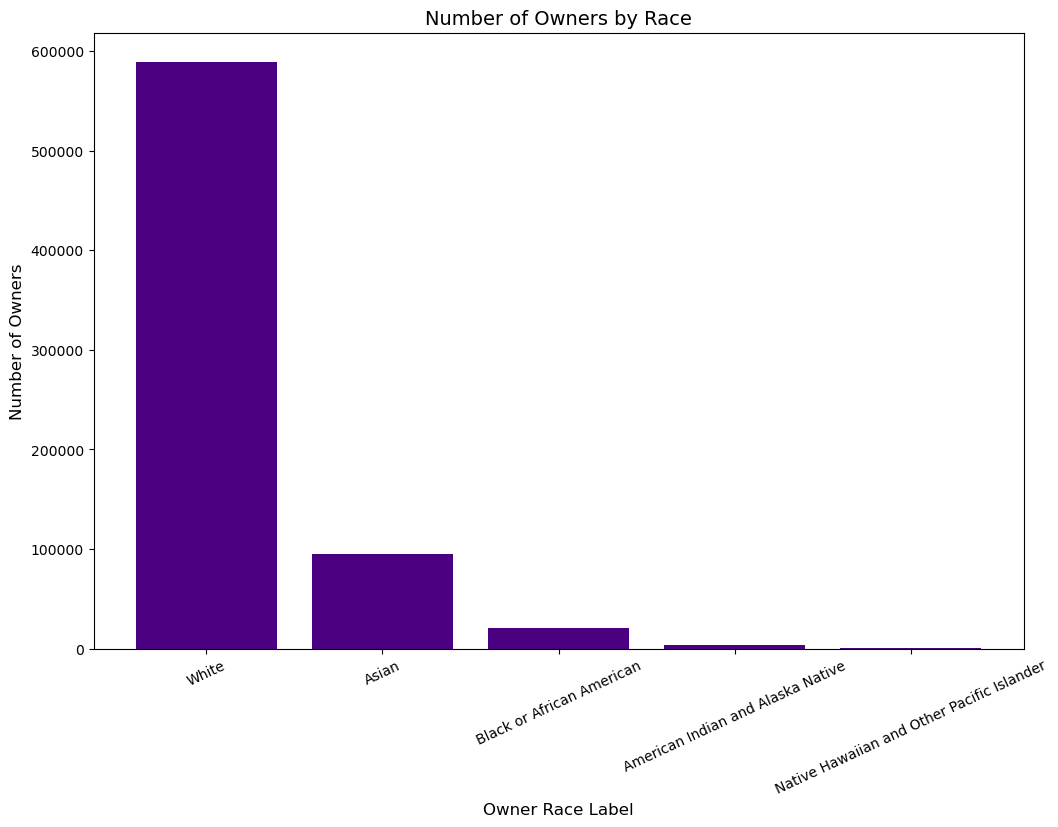

In [31]:
# Set figure size
plt.figure(figsize = (12, 8))
# Bar graph
plt.bar(x=races['owner_race_label'], height = races['number_owners'], color = 'indigo')
# Rotate x-axis data labels 
plt.xticks(rotation = 25)

# Set title and axes labels 
plt.title('Number of Owners by Race', size = 14)
plt.xlabel('Owner Race Label', size = 12)
plt.ylabel('Number of Owners', size = 12);

In [22]:
# Filtered data to get the total number of Hispanic vs Non-Hispanic owners
hispanic_vs_nonhispanic = charbizowner[(charbizowner['owner_sex_label'] == 'All owners of respondent firms') & (charbizowner['owner_race_label'] == 'All owners of respondent firms') & (charbizowner['owner_vet_label'] == 'All owners of respondent firms') & (charbizowner['ownchar_label'] == 'Total reporting') & ((charbizowner['owner_eth_label'] == 'Hispanic') | (charbizowner['owner_eth_label'] == 'Non-Hispanic'))]

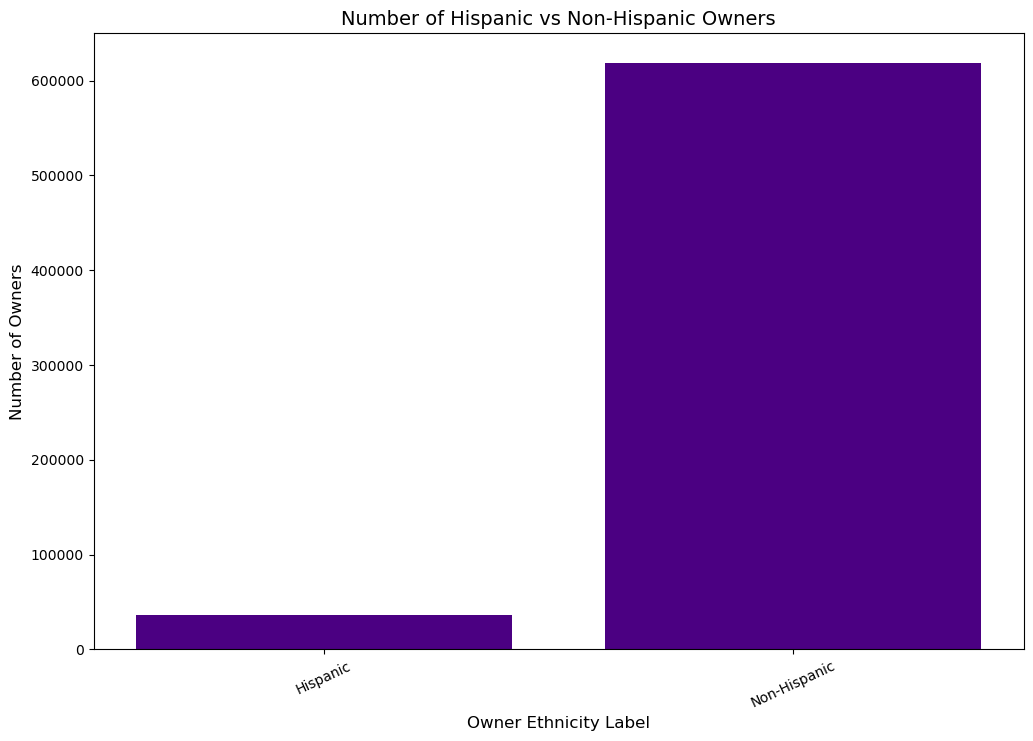

In [23]:
# Set figure size
plt.figure(figsize = (12, 8))
# Bar graph
plt.bar(x=hispanic_vs_nonhispanic['owner_eth_label'], height = hispanic_vs_nonhispanic['number_owners'], color = 'indigo')
# Rotate x-axis data labels
plt.xticks(rotation = 25)

# Set title and axes labels 
plt.title('Number of Hispanic vs Non-Hispanic Owners', size = 14)
plt.xlabel('Owner Ethnicity Label', size = 12)
plt.ylabel('Number of Owners', size = 12);

In [24]:
# Request to get data by state

API_KEY = '1cbf5e86c7037dce27fe5bb28774b53fc7855e90'
BASE_URL = 'https://api.census.gov/data/'

queries_business_owners = [
    "GEO_ID","NAME","OWNER_SEX","OWNER_SEX_LABEL","QDESC","QDESC_LABEL","OWNCHAR","OWNCHAR_LABEL","YEAR","OWNPDEMP","OWNPDEMP_F","OWNPDEMP_PCT","OWNPDEMP_PCT_F","OWNPDEMP_S","OWNPDEMP_S_F","OWNPDEMP_PCT_S","OWNPDEMP_PCT_S_F"
]
charbizowner_state = requests.get(BASE_URL + '2018/abscbo?get='+ ','.join(queries_business_owners) +'&for=state:*&key=' + API_KEY).json()

charbizowner_state = pd.DataFrame(charbizowner_state[1:], columns=charbizowner_state[0])


In [25]:
# Same steps as above

charbizowner_state[['OWNPDEMP_PCT_S','OWNPDEMP_S','OWNPDEMP_PCT','OWNPDEMP','YEAR']]=charbizowner_state[['OWNPDEMP_PCT_S','OWNPDEMP_S','OWNPDEMP_PCT','OWNPDEMP','YEAR']].apply(pd.to_numeric)
charbizowner_state.columns = charbizowner_state.columns.str.lower()
charbizowner_state.rename(columns = {
    'ownpdemp': 'number_owners',
    'ownpdemp_pct': 'percent_numb_owners',
    'ownpdemp_s': 'se_numb_owners',
    'ownpdemp_pct_s': 'se_percent_numb_owners'
}, inplace = True)
charbizowner_state = charbizowner_state[(charbizowner_state['ownpdemp_pct_f'] != 'X') & (charbizowner_state['ownpdemp_pct_f'] != 'D')]

In [26]:
# Filtered to focus on the data pertaining to education and to exclude total reporting
charbizowner_state_educ = charbizowner_state[(charbizowner_state['qdesc_label'] == 'EDUC') & (charbizowner_state['ownchar_label'] != 'Total reporting')]

In [27]:
# Grouped by education (bachelor's, master's, high school/GED) to get the mean value across all states 
result = charbizowner_state_educ.groupby(['ownchar_label'])['number_owners'].mean().reset_index().sort_values('number_owners', ascending = False)

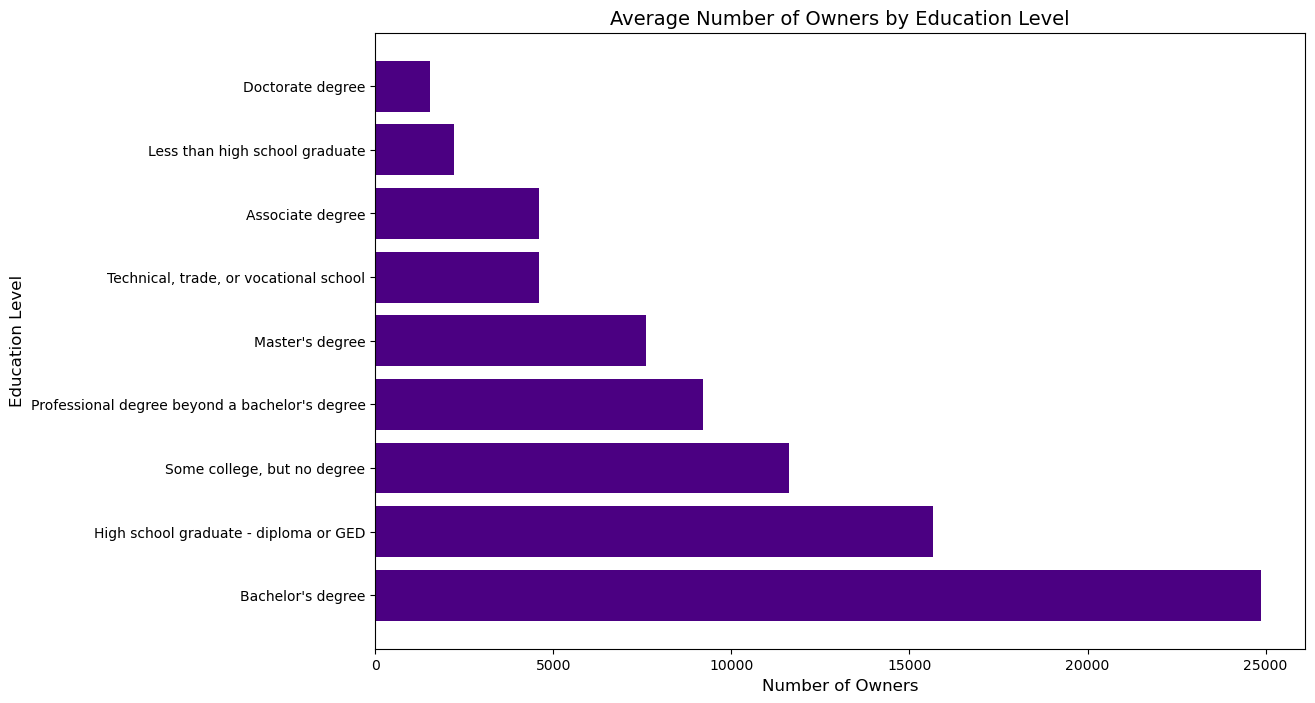

In [28]:
# Set figure size
plt.figure(figsize = (12, 8))
# Horizontal bar graph
plt.barh(y=result['ownchar_label'], width = result['number_owners'], color = 'indigo')

# Set title and axes labels 
plt.title('Average Number of Owners by Education Level', size = 14)
plt.xlabel('Number of Owners', size = 12)
plt.ylabel('Education Level', size = 12);

In [24]:
# Focused on Bachelor's since business owners were more likely to have that degree
bachelors = charbizowner_state_educ[(charbizowner_state_educ['ownchar_label'] == "Bachelor's degree")]
# Sorted values so that the columns would be in descending order 
bachelors = bachelors.sort_values('number_owners', ascending = False)

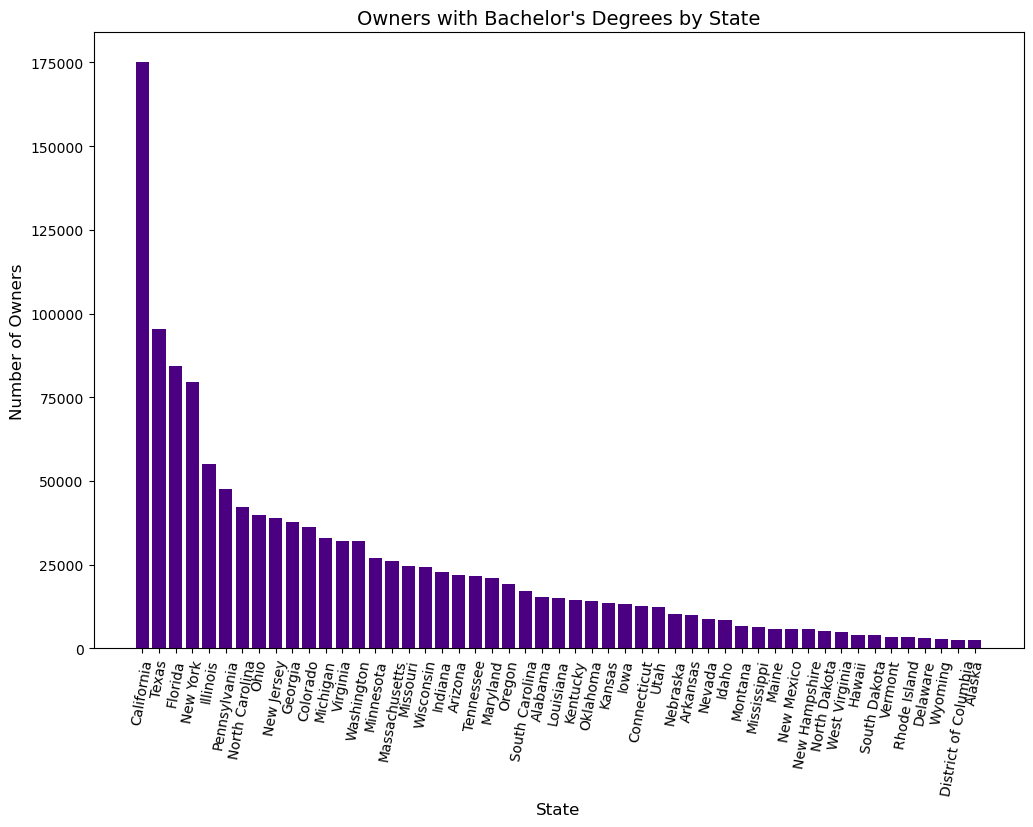

In [26]:
# Set figure size 
plt.figure(figsize = (12, 8))
# Bar graph
plt.bar(x=bachelors['name'], height = bachelors['number_owners'], color = 'indigo')
# Rotate x-axis data labels 
plt.xticks(rotation = 80)

# Set title and axes labels 
plt.title("Owners with Bachelor's Degrees by State", size = 14)
plt.xlabel('State', size = 12)
plt.ylabel('Number of Owners', size = 12);

<h3>Technology Characteristics of Businesses</h3>
<h6>________________________________________________________________________________________________________________________</h6>

In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

key = '2b1b51cb6cacd2a75465fb1f00658932f347374e'

In [2]:
#Technology Characteristics of Businesses for=state Year=2018
urltech= f'https://api.census.gov/data/2018/abstcb?get=NAICS2017,NAICS2017_LABEL,TECHUSE,TECHUSE_LABEL,FIRMPDEMP,FIRMPDEMP_F,EMP,PAYANN,PAYANN_F&for=us&key={key}'
response4 = requests.get(urltech)
data4 = json.loads(response4.text)
techchar = pd.DataFrame.from_dict(data4)
newcolumns4 = techchar.iloc[0]
# Remove the first row from the DataFrameNAICS2017_LABEL,
techchar = techchar.iloc[1:]
# Rename the columns using the `rename()` method
techchar.rename(columns=newcolumns4, inplace=True)
techchar.reset_index(inplace = True)

 Changed the datatype of FIRMPDEMP, EMP, and PAYANN into numeric

In [3]:
techchar[['FIRMPDEMP','EMP','PAYANN']] = techchar[['FIRMPDEMP','EMP','PAYANN']].apply(pd.to_numeric)
techuses= techchar.copy()

Droped rows for 'Total for all sectors' and unecessary columns NAICS2017, us and TECHUSE

In [4]:
indexNA = techuses[(techuses['NAICS2017_LABEL'] == 'Total for all sectors')].index
techuses.drop(indexNA , inplace=True)
techuses= techuses.drop(['NAICS2017','us','TECHUSE'], axis=1)

Renamed columns 

In [5]:
techuses.rename(columns={'NAICS2017_LABEL':'Industry','PAYANN':'Annual Payroll','EMP':'Number of Employees','TECHUSE_LABEL':'Tech Use','FIRMPDEMP':'Number of firms'}, inplace=True)

In order to easily obtain the different levels of use for each particular technology, 'Tech Use' was split in to two columns.

In [6]:
techuses[['Technology Used','Level of Use']] = techuses['Tech Use'].str.split(': ', expand=True)
techuses= techuses.drop(['Tech Use'], axis=1)

Total use and Total reporting seem to be similar data containing the totals, therefore, they are filtered out of the dataframe. The rows containg 'Don't Know' do not  ontribute useful information towards our visualizations, hence they are excluded as well.  

In [7]:
techuses= techuses.loc[~techuses['Level of Use'].isin(['Total use','Total Reporting',"Don't know"])]

Calculated average salary and added the column towards our dataframe.

In [8]:
techuses['Average Salary']= techuses['Annual Payroll']/techuses['Number of Employees']

Created subsets of different technologies. We wanted to drill down on software based technologies Artificial Intelligence, Cloud-Based and Specialized Software

In [9]:
software= techuses[techuses['Technology Used'] == 'Specialized Software']
ai= techuses[techuses['Technology Used']== 'Artificial Intelligence']
cloud= techuses[techuses['Technology Used'] == 'Cloud-Based']


Some annual payrolls (PAYANN) amount to 0, and are flagged in order to avoid disclosing data for individual companies or the estimate does not meet publication standards. Therefore, we dropped the flagged rows under PAYANN_F. Null values for Average Salaries were dropped as well. 

In [10]:
indexPAY = techuses[(techuses['PAYANN_F'] == 'S') | (techuses['PAYANN_F'] == 'D')].index
techuses.drop(indexPAY , inplace=True)
techuses= techuses.dropna(subset = ['Average Salary'])

In [11]:
firmtech= techuses[['Industry','Technology Used','Level of Use','Number of firms']].copy()

<h5>What technologies are mostly used by employer firms?<h5>

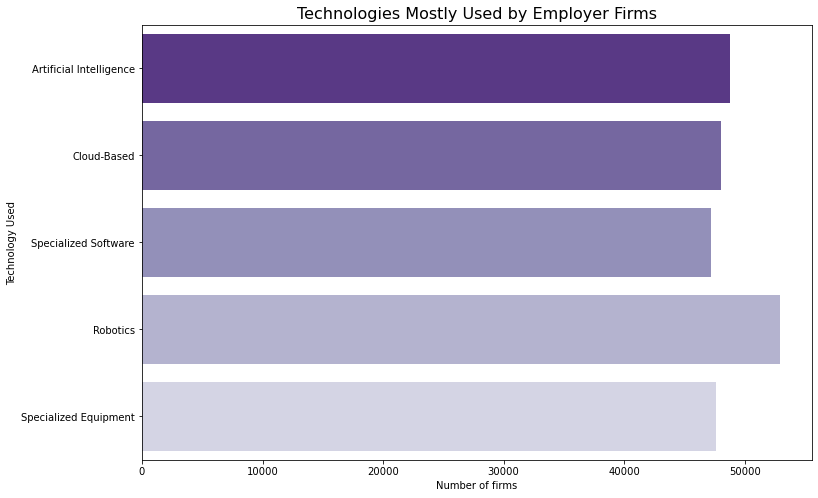

In [12]:
sns.set_palette(palette= 'Purples_r')
plt.figure(figsize= (12,8))
sns.barplot(y= firmtech['Technology Used'], x=firmtech['Number of firms'], data=firmtech, ci=None);
plt.title('Technologies Mostly Used by Employer Firms', size= 16);
plt.show()

<h5>How are salaries distributed for the amount use of software based technologies?<h5>

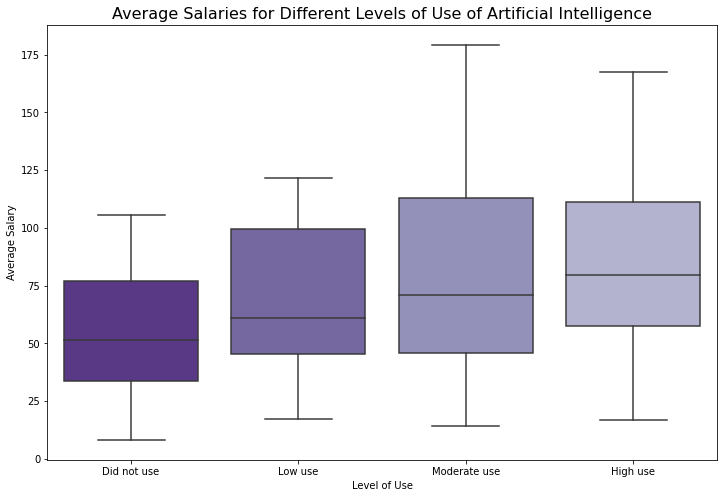

In [13]:
plt.figure(figsize=(12,8))
sns.set_palette(palette= 'Purples_r')
ai_plot= sns.boxplot(x='Level of Use', y='Average Salary', data= ai, order=['Did not use','Low use','Moderate use','High use'])
plt.title('Average Salaries for Different Levels of Use of Artificial Intelligence', size= 16);

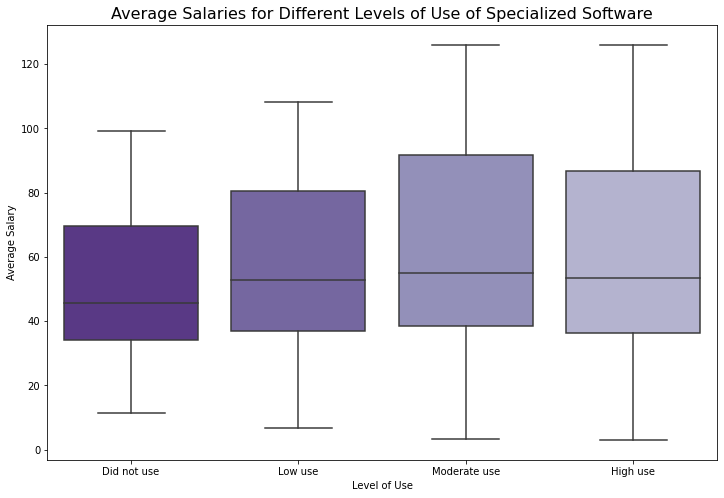

In [15]:
plt.figure(figsize=(12,8))
sns.set_palette(palette= 'Purples_r')
software_plot= sns.boxplot(x='Level of Use', y='Average Salary', data=software, order=['Did not use','Low use','Moderate use','High use'])
plt.title('Average Salaries for Different Levels of Use of Specialized Software', size= 16);

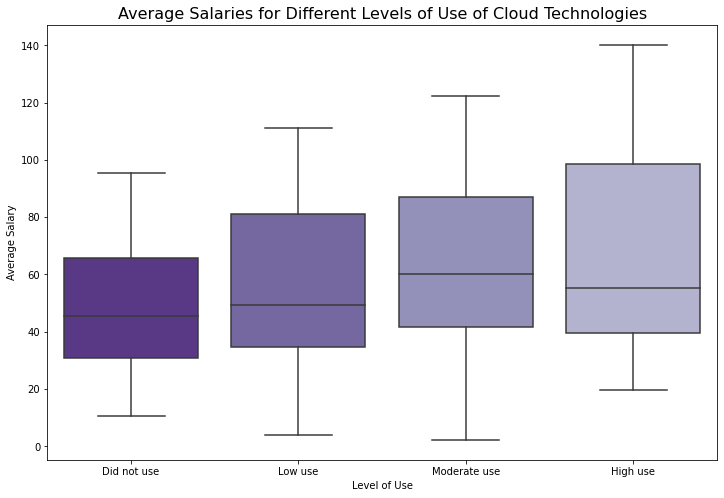

In [16]:
plt.figure(figsize=(12,8))
sns.set_palette(palette= 'Purples_r')
software_plot= sns.boxplot(x='Level of Use', y='Average Salary', data=cloud, order=['Did not use','Low use','Moderate use','High use'])
plt.title('Average Salaries for Different Levels of Use of Cloud Technologies', size= 16);

We wanted to get the breakdown of salaries for industries that work with AI. We grouped Technologies and Industry frome the Artificial Intelligence dataframe. 

In [17]:
group_tech= ai.groupby(['Technology Used','Industry'])['Average Salary'].mean()
ai_industry= ai['Industry'].unique()
ai_industry.sort()


Created a new dataframe with the average salaries for each particular industry. 

In [18]:
Payroll_ai= (pd.DataFrame([list(group_tech),ai_industry])).T
Payroll_ai = Payroll_ai.rename({0: 'Average Salary', 1: 'Industry'}, axis='columns')

Dropped null values from new dataframe and sorted values. 

In [19]:
Payroll_a= Payroll_ai.dropna()
Payroll_a.sort_values(by='Average Salary', ascending=True, inplace=True)

<h5>Which industries contain the highest salaries working with Artificial Intelligence?<h5>

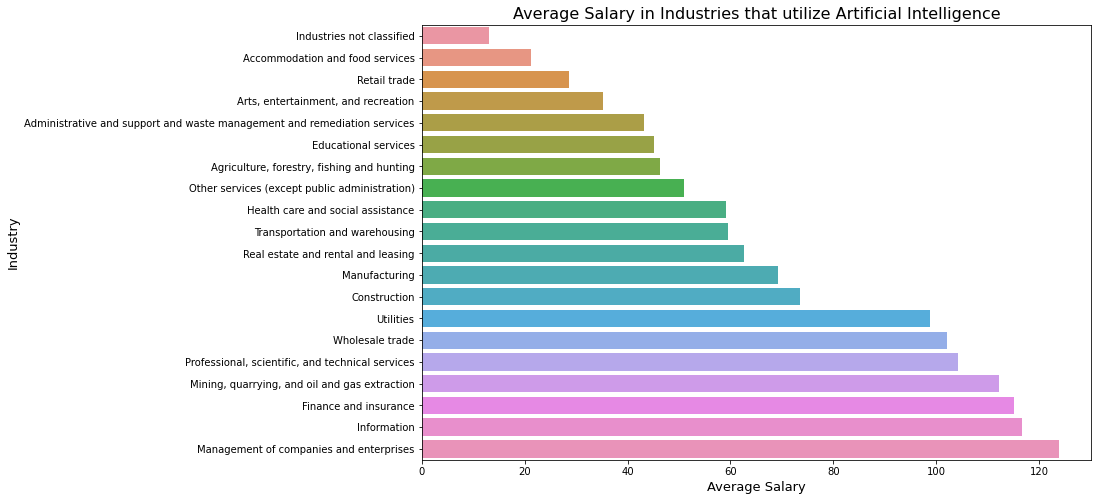

In [22]:
sns.set_palette(palette= 'Purples_r')
plt.figure(figsize= (12,8))
sns.barplot(y= Payroll_a['Industry'], x= (Payroll_ai['Average Salary']));
plt.title('Average Salary in Industries that utilize Artificial Intelligence', size= 16);
plt.xlabel('Average Salary', size= 13);
plt.ylabel('Industry', size = 13);
plt.show()